# Fourier Work
The following are exercises from Mark Newman's Computational Physics book.

## 1) Basics of DFTs

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

1.1 Write a function that performs a discrete Fourier Transform on a *real-valued* signal.

Bonus: utilize `numba.njit` to optimize the function.

In [2]:
# 1.1 SOLUTION
# pure python
def py_dft(y):
    """ Discrete Fourier Transform for real-valued signals"""
    N = len(y)
    coefs = np.zeros(N//2 + 1, dtype=np.complex)
    const = -1*np.pi/N*2j
    for k in range(N//2 + 1):
        for n in range(N):
            coefs[k] += y[n]*np.exp(const*k*n)
    return coefs

# 1.1 BONUS SOLUTION
@numba.njit
def dft(y):
    """ Discrete Fourier Transform for real-valued signals
        
        Parameters
        ----------
        y : Sequence[float]
            N evenly-spaced samples
        
        Returns
        -------
        List[complex]
            N//2 + 1 Fourier coefficients"""
    N = len(y)
    coefs = []
    const = -1*np.pi/N*2j
    for k in range(N//2 + 1):
        ck = 0
        for n in range(N):
            ck += y[n]*np.exp(const*k*n)
        coefs.append(ck)
    return coefs
        

Consider the sine-wave with period $T$ (and thus frequency $\frac{1}{T}$). Let's assume that $T$ has units of seconds.

\begin{equation}
f(t) = sin(\frac{2 \pi}{T}t)
\end{equation}

1.2 Using Euler's formula, write this sine wave in the form of a Fourier series.
> 1.2 Solution: $f(t) = \frac{1}{2i}e^{i\frac{2 \pi}{T}t} + \frac{-1}{2i}e^{i\frac{2 \pi (T - 1)}{T}t}$


1.3 Take $N$ samples of this sine wave over several complete periods of oscillation (an integer multiple of $T$). That is, at $t = \frac{n}{N}L$; for $n = 0, 1, ... N-1$.

In [3]:
#1.3 SOLUTION
T = 150  # seconds
L = 4 * T  # length of sample
N = 100 # number of samples
t = np.linspace(0, L, N)
y = np.sin(2*np.pi*t/T)

1.4 Plot the sampled signal, $y_{n}$.

<IPython.core.display.Javascript object>


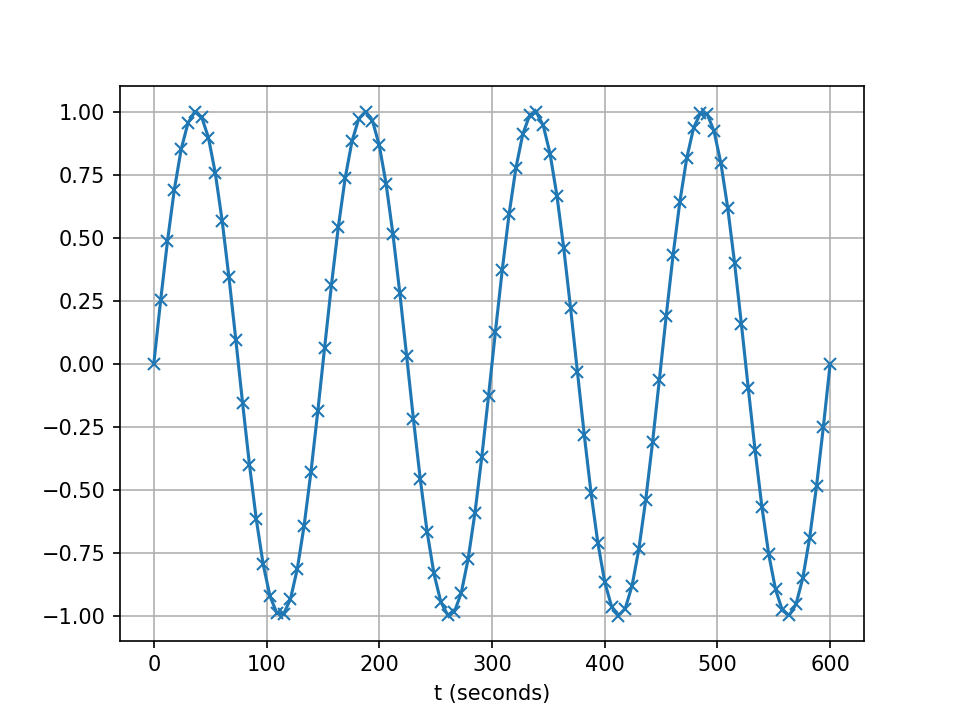

In [4]:
# 1.4 SOLUTION
fig,ax = plt.subplots()
ax.plot(t,y, marker='x')
ax.grid()
ax.set_xlabel("t (seconds)")

1.5 Perform a real-valued DFT of the sampled wave-form, obtaining $c_{k}$. How many Fourier-coefficients will be produced? Verify that numpy's FFT (for real-valued signals), `np.fft.rfft`, returns the same results. Use the function `numpy.allclose`.

In [5]:
# 1.5 Solution
c = dft(y)
assert len(c) == N//2 + 1
assert np.allclose(c, np.fft.rfft(y))

1.6 $k$ takes on integer values: $0, 1, ..., N//2 + 1$. Convert $k$ into frequency, $\nu$, with units of Hz ( 1 / seconds ).
> 1.6 Solution: To convert to physical units: $t = \frac{n}{N}L$ and $\nu = \frac{k}{L}$. In the same way that $\nu = \frac{\omega}{2\pi}$, here $2\pi \rightarrow L$

In [6]:
# 1.6 SOLUTION
k = np.arange(N//2 + 1)
v = k / L  # units: Hz

1.7 What should the plot of $|c_{k}|$ vs $k$,  look like, given the data we took the DFT of?
> 1.7 Solution: The coefficients should be nearly zero for all $\nu$, except for $\nu = \frac{1}{T}$ (i.e. $k = \frac{L}{T}$)

1.8 Plot $|c_{\nu}|$ vs $\nu$ along with a vertical line, where you predict the peak to occur.

<IPython.core.display.Javascript object>


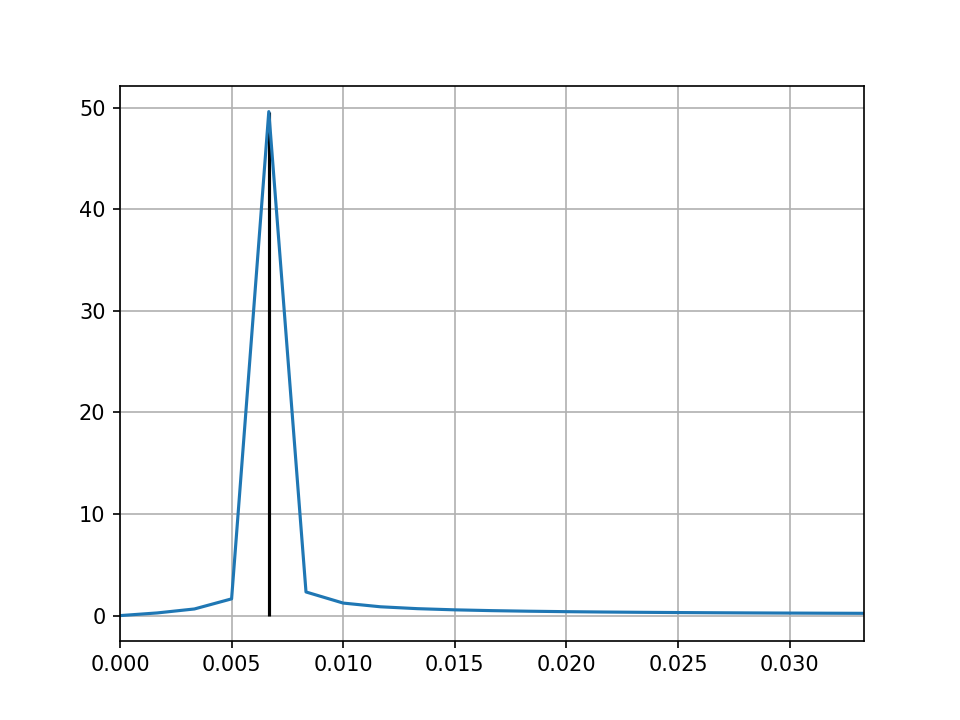

In [7]:
# 1.8 SOLUTION
fig, ax = plt.subplots()
abs_c = [np.abs(i) for i in c]
ax.plot(v, abs_c)
ax.set_xlim(0, 5/T)
ax.vlines(1/T, 0, max(abs_c))
ax.grid()

Assume that this peak-valued coefficient, $c_{p}$, is the only non-zero coefficient. In reality there are a few very small, but non-zero coefficients in its viscinity.

Given the Fourier series that you wrote above, and the equation for the DFT, see that the following relation must hold
\begin{equation}
\frac{1}{2i}e^{i\frac{2 \pi}{T}t} + \frac{-1}{2i}e^{i\frac{2 \pi (T - 1)}{T}t} \approx \frac{1}{N}(c_{p}e^{i\frac{2 \pi}{T}t} + c^{*}_{p}e^{i\frac{2\pi (T - 1)}{T}t})
\end{equation}

1.8 Verify that $\frac{c_{p}}{N} \approx \frac{1}{2i}$

In [8]:
# 1.8 SOLUTION
print(c[L//T]/N)

(0.06218106086769313-0.4922137798233527j)


Recall that the DFT expression on the right exactly reproduces the *sampled* data, and not the exact sine-wave. Furthermore, there are other small, but non-zero coefficients from our DFT that we are ignoring. This is why the equality is only approximate. Try increasing $N$, and see that this improves the precision of the equality.

1.9 Using the approximate expression on the right, write a function that performs an inverse DFT in order to recover the sampled data, $y_{n}$.

In [16]:
# 1.9 SOLUTION
def idft(c, N):
    x = np.arange(N)
    out = c * np.exp(4 *x /N * np.pi * 2j)
    out += np.conjugate(out)
    out /= N
    return out

new_y = idft(c[L//T], N)

1.10 Plot the recovered sampled data and the original data. Once again, note that we are making an approximation in this inverse DFT, since we are only using the peak-valued coefficient. If we utilized all of the coefficients, the resampled data will match **exactly** with the sampled data.

<IPython.core.display.Javascript object>


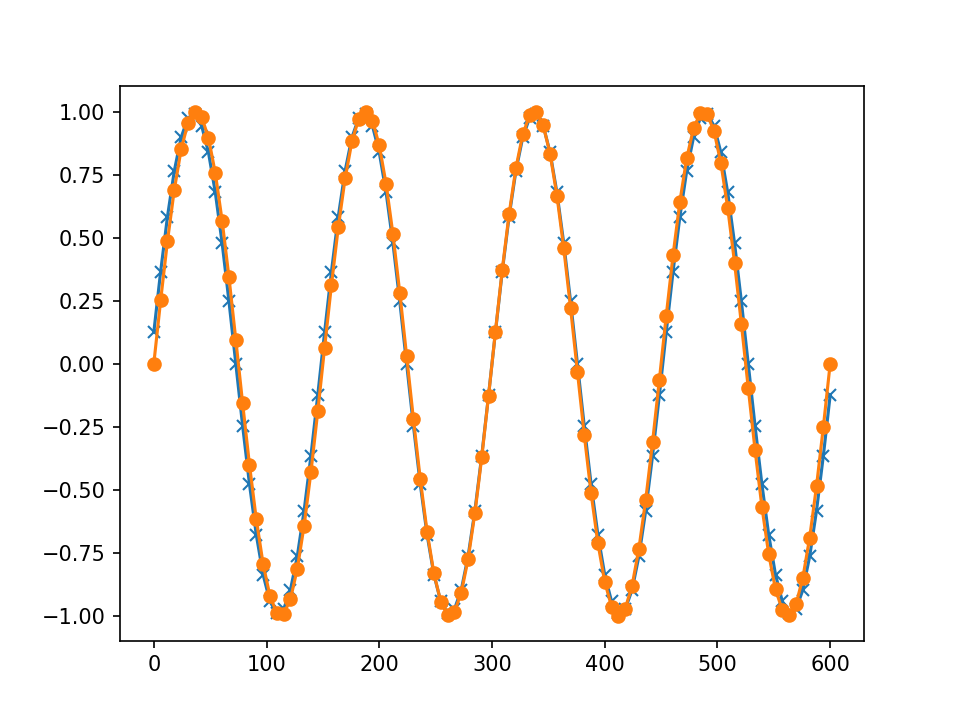

C:\Users\Ryan\Anaconda\envs\py36\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [17]:
# 1.10 SOLUTION
fig,ax = plt.subplots()
ax.plot(t, new_y, marker='x')
ax.plot(t, y, marker='o');

1.11 Use `np.fft.irfft` to compute the *exact* inverse DFT and verify that it recovers the original sampled data.

In [19]:
# 1.11
np.allclose(np.fft.irfft(c), y)

1.12 Given this result, what information is needed in addition to the Fourier coefficients to completely reproduce the original data and its domain?
> 1.12 Solution: You need the sample rate and that a real-valued DFT was performed (i.e. that $c_{i} = c_{N-i}^{*}$)